# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [93]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [104]:
#base url
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q=" #+city
#listing city data
cityData =[]

#grouping variables
set_count = 1 # group
record = 1 # record within the group

print("Beginning Data Retrieval")
print("---------------------------")

for i, city in enumerate(cities):
    #ggroup the cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1 #make a new group
        record = 1 #reset the ount of records in the new group
        
       #output the record and group being processed from the list of cities
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    #increase the record count within the set
    record += 1
    
    #create a url that inclused the city
    cityURL = url + city
    
    #call the openWeather API and make a request
    
    try:
        cityWeather = requests.get(cityURL).json()
        #parse out data
        lat = cityWeather["coord"]["lat"]
        lon = cityWeather["coord"]["lon"]
        maxTemp = cityWeather["main"]["temp_max"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]
        date = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "Lat": lat,
                        "Lon": lon,
                        "Max Temp": maxTemp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": windspeed,
                        "Date": date})
        
    except:
        print(f"{city} not found. Skipping...")
        pass
    
#     if(i==5):
#         break

Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | ebano
ebano not found. Skipping...
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | havre-saint-pierre
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | camacha
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | attawapiskat
attawapiskat not found. Skipping...
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | northam
Processing Record 16 of Set 1 | sitka
Processing Record 17 of Set 1 | tra vinh
Processing Record 18 of Set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 19 of Set 1 | salamiyah
Processing Record 20 of Set 1 | hovd
Processing Re

Processing Record 32 of Set 4 | san policarpo
Processing Record 33 of Set 4 | dudinka
Processing Record 34 of Set 4 | griffith
Processing Record 35 of Set 4 | dikson
Processing Record 36 of Set 4 | santa eulalia del rio
santa eulalia del rio not found. Skipping...
Processing Record 37 of Set 4 | klaksvik
Processing Record 38 of Set 4 | paamiut
Processing Record 39 of Set 4 | yazd
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | aksarka
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | nouadhibou
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | port moresby
Processing Record 46 of Set 4 | richards bay
Processing Record 47 of Set 4 | manta
Processing Record 48 of Set 4 | barrow
Processing Record 49 of Set 4 | upernavik
Processing Record 50 of Set 4 | verkhnevilyuysk
Processing Record 1 of Set 5 | alexandria
Processing Record 2 of Set 5 | mareeba
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set

Processing Record 18 of Set 8 | suileng
Processing Record 19 of Set 8 | margate
Processing Record 20 of Set 8 | arys
Processing Record 21 of Set 8 | geresk
geresk not found. Skipping...
Processing Record 22 of Set 8 | makakilo city
Processing Record 23 of Set 8 | guadalupe y calvo
Processing Record 24 of Set 8 | nortelandia
Processing Record 25 of Set 8 | ust-tsilma
Processing Record 26 of Set 8 | high level
Processing Record 27 of Set 8 | chokurdakh
Processing Record 28 of Set 8 | katangli
Processing Record 29 of Set 8 | stolin
Processing Record 30 of Set 8 | aykhal
Processing Record 31 of Set 8 | orodara
Processing Record 32 of Set 8 | aksum
Processing Record 33 of Set 8 | oussouye
Processing Record 34 of Set 8 | selfoss
Processing Record 35 of Set 8 | sokoni
Processing Record 36 of Set 8 | la primavera
Processing Record 37 of Set 8 | mount gambier
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | ordynskoye
Processing Record 40 of Set 8 | blythe
Processing Reco

Processing Record 5 of Set 12 | pravia
Processing Record 6 of Set 12 | saint-doulchard
Processing Record 7 of Set 12 | rumonge
Processing Record 8 of Set 12 | petropavlovka
Processing Record 9 of Set 12 | hecun
Processing Record 10 of Set 12 | mbigou
Processing Record 11 of Set 12 | prince rupert
Processing Record 12 of Set 12 | flin flon
Processing Record 13 of Set 12 | warqla
warqla not found. Skipping...
Processing Record 14 of Set 12 | barabai
Processing Record 15 of Set 12 | namibe
Processing Record 16 of Set 12 | dongning
Processing Record 17 of Set 12 | ngunguru
Processing Record 18 of Set 12 | palanpur
Processing Record 19 of Set 12 | katherine
Processing Record 20 of Set 12 | aleksandrovskiy zavod
Processing Record 21 of Set 12 | komsomolskiy
Processing Record 22 of Set 12 | bawku
Processing Record 23 of Set 12 | puerto madero
Processing Record 24 of Set 12 | krasnyy kut
Processing Record 25 of Set 12 | fairview
Processing Record 26 of Set 12 | naze
Processing Record 27 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
cityData_pd = pd.DataFrame(cityData)
cityData_pd

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,castro,-24.7911,-50.0119,51.08,95,22,2.46,1619149858
1,port elizabeth,-33.9180,25.5701,62.60,94,0,16.11,1619149859
2,mataura,-46.1927,168.8643,52.00,91,100,7.00,1619149721
3,hithadhoo,-0.6000,73.0833,83.08,71,90,6.31,1619149860
4,mahebourg,-20.4081,57.7000,73.40,94,75,3.44,1619149860
...,...,...,...,...,...,...,...,...
569,ahipara,-35.1667,173.1667,66.56,81,87,5.59,1619149687
570,harper,4.3750,-7.7169,80.02,86,100,6.40,1619149688
571,khasan,42.4308,130.6434,50.86,66,100,5.93,1619149688
572,ouadda,8.0777,22.4007,70.30,73,89,4.90,1619149688


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [106]:
cityData_pd = cityData_pd.loc[(cityData_pd["Humidity"] <= 100)]
len(cityData_pd)


574

In [107]:
#  Get the indices of cities that have humidity over 100%.
city_data_humidity = cityData_pd[(cityData_pd["Humidity"] > 100)].index
city_data_humidity

Int64Index([], dtype='int64')

In [108]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityData_pd.drop(city_data_humidity, inplace = False)
clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,castro,-24.7911,-50.0119,51.08,95,22,2.46,1619149858
1,port elizabeth,-33.9180,25.5701,62.60,94,0,16.11,1619149859
2,mataura,-46.1927,168.8643,52.00,91,100,7.00,1619149721
3,hithadhoo,-0.6000,73.0833,83.08,71,90,6.31,1619149860
4,mahebourg,-20.4081,57.7000,73.40,94,75,3.44,1619149860
...,...,...,...,...,...,...,...,...
569,ahipara,-35.1667,173.1667,66.56,81,87,5.59,1619149687
570,harper,4.3750,-7.7169,80.02,86,100,6.40,1619149688
571,khasan,42.4308,130.6434,50.86,66,100,5.93,1619149688
572,ouadda,8.0777,22.4007,70.30,73,89,4.90,1619149688


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

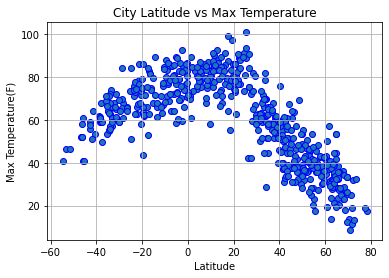

In [109]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title("City Latitude vs Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

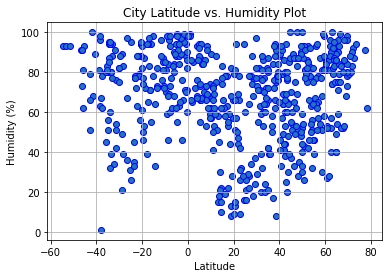

In [110]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity Plot")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs. Humidity Plot.png")

plt.show()

## Latitude vs. Cloudiness Plot

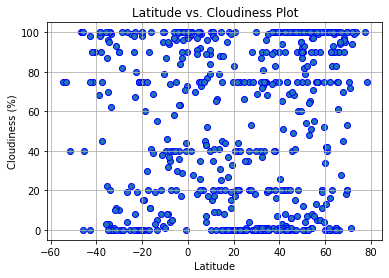

In [111]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness Plot")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness Plot.png")

plt.show()

## Latitude vs. Wind Speed Plot

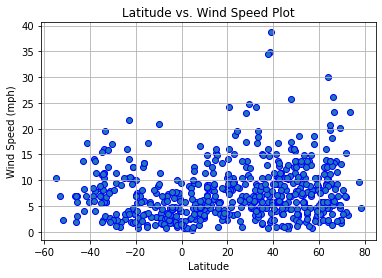

In [112]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", edgecolors = 'b')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed Plot")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed Plot.png")

plt.show()

## Linear Regression

In [113]:
Northern = clean_city_data.loc[(clean_city_data["Lat"] > 0)]
# len(Northern)
Southern = clean_city_data.loc[(clean_city_data["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8848809776043252


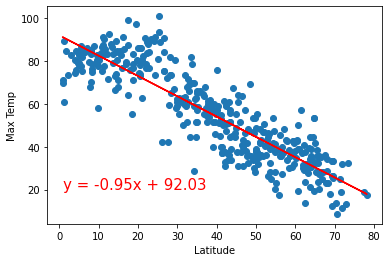

In [129]:
slope, intercept, r_value, p_value, std_err = st.linregress(Northern['Lat'], Northern['Max Temp'])
fit = slope * Northern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Northern['Lat'], Northern['Max Temp'])
plt.scatter(Northern['Lat'], Northern['Max Temp'])

plt.annotate(line_eq,(1,20),fontsize=15,color="red")
plt.plot(Northern['Lat'], fit,"-", color = "r")
# plt.xticks(Northern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Max Temp vs. Latitude Linear Regression.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6797195019661021


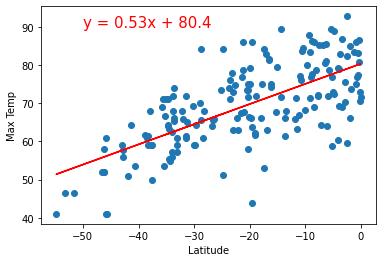

In [131]:
slope, intercept, r_value, p_value, std_err = st.linregress(Southern['Lat'], Southern['Max Temp'])
fit = slope * Southern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Southern['Lat'], Southern['Max Temp'])
plt.scatter(Southern['Lat'], Southern['Max Temp'])

plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.plot(Southern['Lat'], fit,"-", color = "r")
# plt.xticks(Southern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21387671763769098


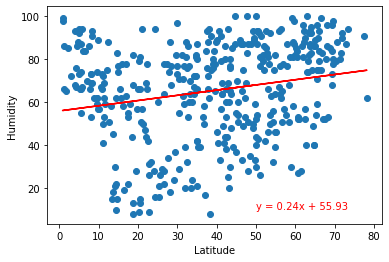

In [134]:
slope, intercept, r_value, p_value, std_err = st.linregress(Northern['Lat'], Northern['Humidity'])
fit = slope * Northern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Northern['Lat'], Northern['Humidity'])
plt.scatter(Northern['Lat'], Northern['Humidity'])

plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.plot(Northern['Lat'], fit,"-", color = "r")
# plt.xticks(Northern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12079164263085179


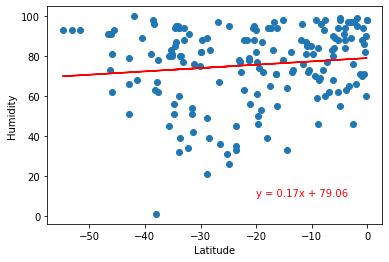

In [137]:
slope, intercept, r_value, p_value, std_err = st.linregress(Southern['Lat'], Southern['Humidity'])
fit = slope * Southern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Southern['Lat'], Southern['Humidity'])
plt.scatter(Southern['Lat'], Southern['Humidity'])

plt.annotate(line_eq,(-20,10),fontsize=10,color="red")
plt.plot(Southern['Lat'], fit,"-", color = "r")
# plt.xticks(Southern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Humidity vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16239855590012187


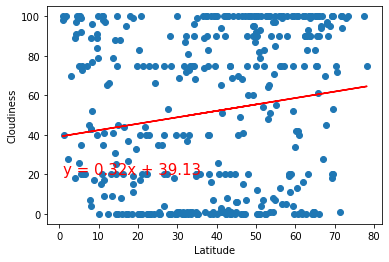

In [138]:
slope, intercept, r_value, p_value, std_err = st.linregress(Northern['Lat'], Northern['Cloudiness'])
fit = slope * Northern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Northern['Lat'], Northern['Cloudiness'])
plt.scatter(Northern['Lat'], Northern['Cloudiness'])

plt.annotate(line_eq,(1,20),fontsize=15,color="red")
plt.plot(Northern['Lat'], fit,"-", color = "r")
# plt.xticks(Northern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04553085068688488


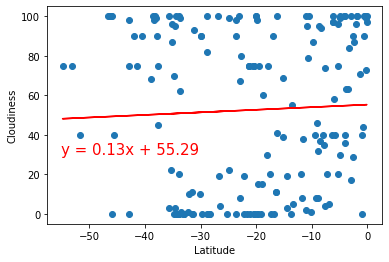

In [141]:
slope, intercept, r_value, p_value, std_err = st.linregress(Southern['Lat'], Southern['Cloudiness'])
fit = slope * Southern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Southern['Lat'], Southern['Cloudiness'])
plt.scatter(Southern['Lat'], Southern['Cloudiness'])

plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.plot(Southern['Lat'], fit,"-", color = "r")
# plt.xticks(Southern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Cloudiness vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1259799332693197


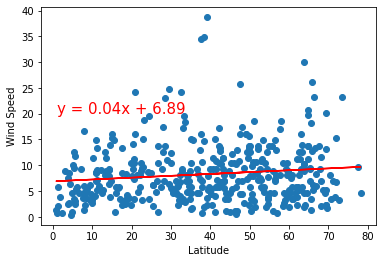

In [142]:
slope, intercept, r_value, p_value, std_err = st.linregress(Northern['Lat'], Northern['Wind Speed'])
fit = slope * Northern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Northern['Lat'], Northern['Wind Speed'])
plt.scatter(Northern['Lat'], Northern['Wind Speed'])

plt.annotate(line_eq,(1,20),fontsize=15,color="red")
plt.plot(Northern['Lat'], fit,"-", color = "r")
# plt.xticks(Northern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.30554649437259407


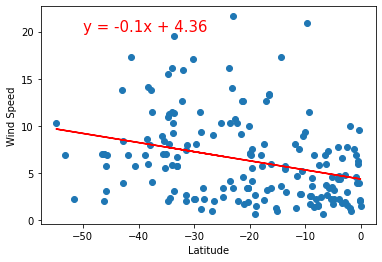

In [144]:
slope, intercept, r_value, p_value, std_err = st.linregress(Southern['Lat'], Southern['Wind Speed'])
fit = slope * Southern['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(Southern['Lat'], Southern['Wind Speed'])
plt.scatter(Southern['Lat'], Southern['Wind Speed'])

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.plot(Southern['Lat'], fit,"-", color = "r")
# plt.xticks(Southern['Lat'], rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {r_value}")
# Save the figure
plt.savefig("Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()